In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirpath, dirnames, filenames in os.walk("/kaggle/input/cats-and-dogs-image-classification"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

There are 2 directories and 0 images in '/kaggle/input/cats-and-dogs-image-classification'.
There are 2 directories and 0 images in '/kaggle/input/cats-and-dogs-image-classification/test'.
There are 0 directories and 70 images in '/kaggle/input/cats-and-dogs-image-classification/test/dogs'.
There are 0 directories and 70 images in '/kaggle/input/cats-and-dogs-image-classification/test/cats'.
There are 2 directories and 0 images in '/kaggle/input/cats-and-dogs-image-classification/train'.
There are 0 directories and 278 images in '/kaggle/input/cats-and-dogs-image-classification/train/dogs'.
There are 0 directories and 279 images in '/kaggle/input/cats-and-dogs-image-classification/train/cats'.


In [2]:
import pathlib

data_dir = pathlib.Path('/kaggle/input/cats-and-dogs-image-classification/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

class_names

array(['cats', 'dogs'], dtype='<U4')

Image shape: (675, 1200, 3)
Image shape: (573, 1020, 3)


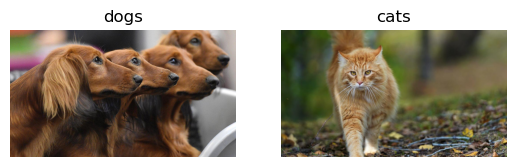

In [3]:
# Xem hình ngẫu nhiên
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class # directory đích
    random_image = random.sample(os.listdir(target_folder), 1) 
    
 
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}')
    
    return img


plt.figure()
plt.subplot(1, 2, 1)
dog_img = view_random_image("/kaggle/input/cats-and-dogs-image-classification/train/", "dogs")
plt.subplot(1, 2, 2)
cat_img = view_random_image("/kaggle/input/cats-and-dogs-image-classification/train/", "cats")

In [4]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train/test directory
train_dir = '/kaggle/input/cats-and-dogs-image-classification/train/'
test_dir = '/kaggle/input/cats-and-dogs-image-classification/test/'

train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='binary')

test_data = train_datagen.flow_from_directory(test_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='binary')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [5]:

model_1 = Sequential([
    Conv2D(filters=16,
          kernel_size=3,
          activation='relu',
          input_shape=(224, 224, 3)), 
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2,
             padding='valid'),
    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid') 
])

model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])


history_1 = model_1.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
35/35 [==============================] - 18s 252ms/step - loss: 1.2521 - accuracy: 0.5332 - val_loss: 0.7865 - val_accuracy: 0.4500
Epoch 2/5
35/35 [==============================] - 4s 117ms/step - loss: 0.9701 - accuracy: 0.5817 - val_loss: 1.9546 - val_accuracy: 0.5071
Epoch 3/5
35/35 [==============================] - 4s 120ms/step - loss: 0.8442 - accuracy: 0.5548 - val_loss: 1.1538 - val_accuracy: 0.5214
Epoch 4/5
35/35 [==============================] - 4s 114ms/step - loss: 0.6886 - accuracy: 0.6607 - val_loss: 1.0032 - val_accuracy: 0.5643
Epoch 5/5
35/35 [==============================] - 4s 112ms/step - loss: 0.8563 - accuracy: 0.6481 - val_loss: 1.7688 - val_accuracy: 0.5071


In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [7]:

def plot_loss_curves(history):
 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

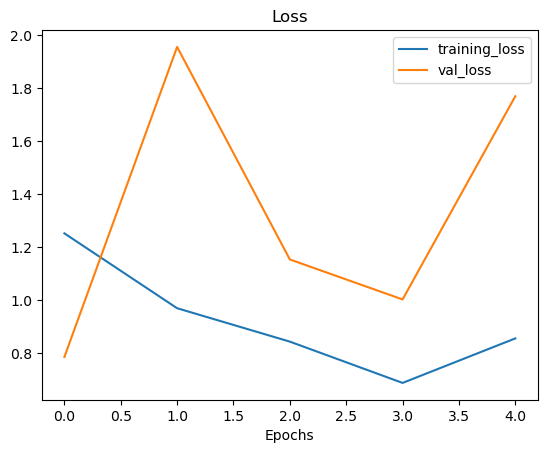

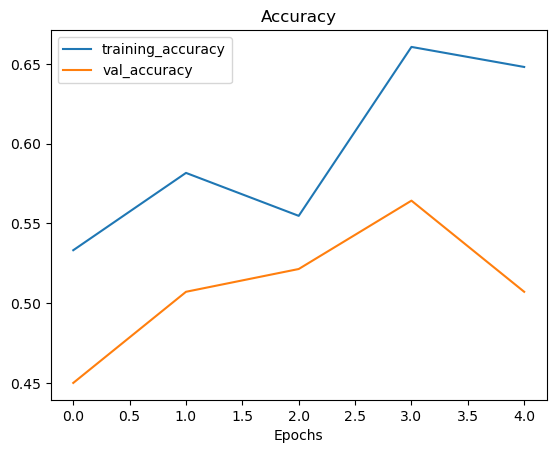

In [8]:
plot_loss_curves(history_1)

In [9]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255.,
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.2, 
    zoom_range=0.2, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    validation_split=0.2)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=16,
                                                                   class_mode='binary',
                                                                   shuffle=True) 

Found 557 images belonging to 2 classes.


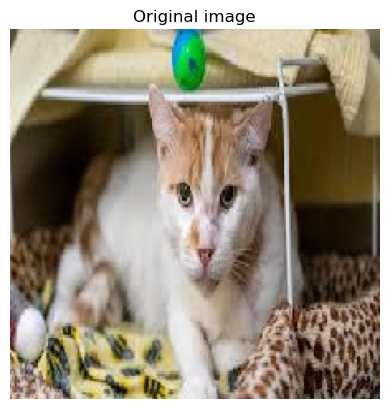

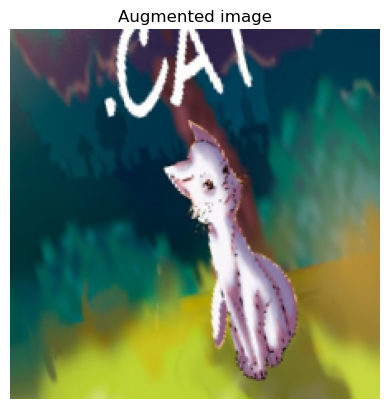

In [10]:

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

random_number = random.randint(0, 16) 
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [11]:

model_2 = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
35/35 [==============================] - 11s 261ms/step - loss: 0.7759 - accuracy: 0.5063 - val_loss: 0.7103 - val_accuracy: 0.4929
Epoch 2/5
35/35 [==============================] - 9s 256ms/step - loss: 0.7610 - accuracy: 0.4937 - val_loss: 0.7814 - val_accuracy: 0.4929
Epoch 3/5
35/35 [==============================] - 9s 257ms/step - loss: 0.7356 - accuracy: 0.5404 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 4/5
35/35 [==============================] - 9s 256ms/step - loss: 0.7547 - accuracy: 0.5027 - val_loss: 0.7144 - val_accuracy: 0.5357
Epoch 5/5
35/35 [==============================] - 9s 257ms/step - loss: 0.7144 - accuracy: 0.5350 - val_loss: 0.7257 - val_accuracy: 0.5357


In [12]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)      

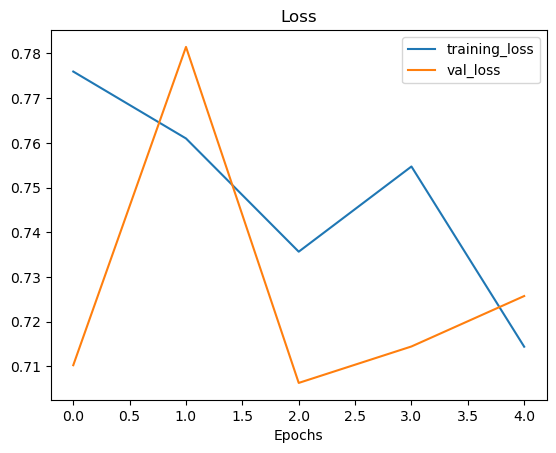

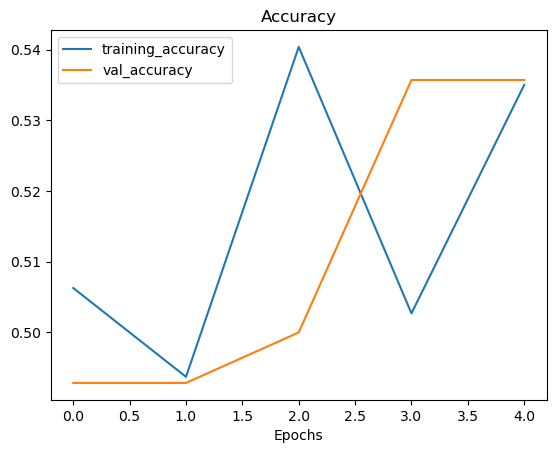

In [13]:
plot_loss_curves(history_2)

In [14]:

from tensorflow.keras.models import clone_model

model_3 = clone_model(model_1)


model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_3 = model_3.fit(train_data_augmented, 
                        epochs=20, 
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
35/35 [==============================] - 11s 256ms/step - loss: 1.8255 - accuracy: 0.5224 - val_loss: 1.3825 - val_accuracy: 0.5000
Epoch 2/20
35/35 [==============================] - 9s 253ms/step - loss: 1.0268 - accuracy: 0.5045 - val_loss: 1.0495 - val_accuracy: 0.5500
Epoch 3/20
35/35 [==============================] - 9s 259ms/step - loss: 0.8007 - accuracy: 0.5673 - val_loss: 1.5384 - val_accuracy: 0.5286
Epoch 4/20
35/35 [==============================] - 9s 262ms/step - loss: 0.9757 - accuracy: 0.5637 - val_loss: 1.4921 - val_accuracy: 0.5286
Epoch 5/20
35/35 [==============================] - 9s 259ms/step - loss: 1.0821 - accuracy: 0.5314 - val_loss: 2.5834 - val_accuracy: 0.5000
Epoch 6/20
35/35 [==============================] - 9s 260ms/step - loss: 1.6477 - accuracy: 0.4973 - val_loss: 0.9984 - val_accuracy: 0.5857
Epoch 7/20
35/35 [==============================] - 9s 258ms/step - loss: 1.1214 - accuracy: 0.5135 - val_loss: 1.0836 - val_accuracy: 0.5500
Epoch

In [15]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

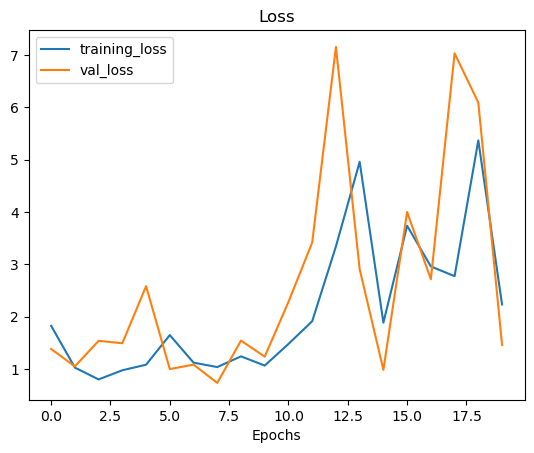

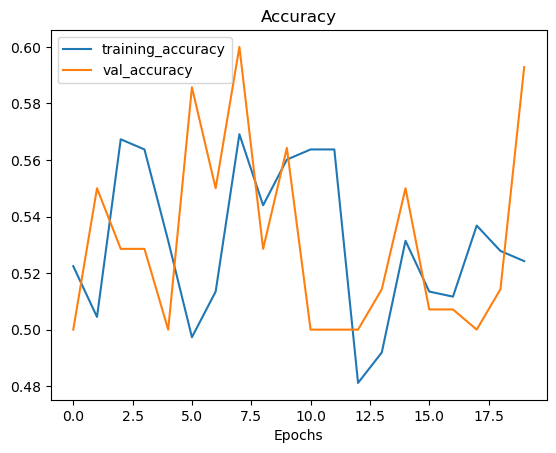

In [16]:
plot_loss_curves(history_3)